# Homework 5: Classification (50 points)

Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.  

**<u>Deadline</u>**:

This assignment is due on **Monday, April 29** at **11:59pm**.

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck.

- Submit your homework 30-60 minutes to ensure that it will upload before the deadline.

- Please run all of your code cells and ensure all of your answers are outputted and visible to graders.

- Check the file preview on Gradescope to make sure all of your answers are visible.

- Be mindful of your file sizes. Do not print out entire large datasets use .head or .tail instead. Make sure your document is visible in the Gradescope preview.

- Your functions should have a docstring. Points may be taken off for not including a docstring.

- Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axes should make sense for the data. If these items are missing, points may be taken off. 

In [2]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# the Euclidean distance
def distance(pt1, pt2):   
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def row_wise_distance(row, my_point):
    '''Computes the distance between the given my_point and a single df row'''
    return distance(my_point, np.array(row))

def closest_k(df, point, k):
    """Outputs a df containing the k closest rows in the input df to array 'point' """
    df = df.assign(Distance_to_point = df.apply(row_wise_distance, args=(point,), axis=1))
    df = df.sort_values('Distance_to_point') 
    topk = df.head(k)
    return topk



def majority(topkclasses):
    """1 if the majority of the "Class" column is 1's, and 0 otherwise."""
    ones = topkclasses[topkclasses.Class==1].shape[0]
    zeros = topkclasses[topkclasses.Class==0].shape[0]
    if ones > zeros:
        return 1
    else:
        return 0
    
def classify_grid(given_data, test):
    c = np.array([])
    for i in range(test.shape[0]):
        # Run the classifier on the ith patient in the test set
        
        c = np.append(c, closest(given_data,test.iloc[i]).Label)
    return c

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    topkclasses = closest_k(training, p, k)
    return majority(topkclasses.join(characteristic_df['Class']))

def closest(X_train, Y_train, point, k):
    """Outputs a df containing the k closest rows in the training data to array 'point' """
    X_train = X_train.assign(Distance_to_point = X_train.apply(row_wise_distance, args=(point,), axis=1))
    X_train = X_train.sort_values('Distance_to_point') 
    X_train['Predicted_Class'] = Y_train
    topk = X_train.head(k)
    return topk

def majority_multiclass(topkclasses):
    """returns the class with the majority 
    over the "Class" column"""

    return topkclasses['Predicted_Class'].value_counts().idxmax()

def classify_test(X_train,Y_train, X_test, k):
    """Classify data in X_test using k-nearest neighbor classification with the given training data.
    Output is a DataFrame with X_test appended by a column of Class prediction"""
    n=X_test.shape[0] 
    
    pred_class = np.array([])
    for i in np.arange(n):
        topkclasses = closest(X_train,Y_train, X_test.iloc[i], k)
        pred_class = np.append(pred_class,majority_multiclass(topkclasses))
    
    report_df=X_test.copy()
    report_df['Predicted_Class']=pred_class
    
    return report_df

## 1. Intuition on classification (5 points)

#### Question 1. (2 points)
Suppose you have a large dataset `breast-cancer` which has 11 columns. The first ten are attributes of the person that might be predictive of whether or not someone has breast-cancer, and the 11th column indicates whether they have it or not. 99% of the table contains examples of people who do not have breast cancer. 

Imagine you are trying to use a kNN classifier to use the first ten columns to predict whether or not someone has breast cancer. You split your training and test set up as necessary, you develop a 7 Nearest Neighbors classifier, and you notice your classifier predicts every point in the test set to be a person who does not have breast cancer. Is there a problem with your code? Explain what is happening.   
Your answer should be 2-5 sentences.

**Answer:**
There doesn't seem to be a problem with our code, as much as the fact that we have a class imbalance in the dataset. If we are given a dataset that has 99% positive scenarios, our kNN classifier will inherently be biased no matter the correctness of our code, unless that 99% is truly indicative of the true distribution of classes in the population being represented. If the dataset accurately reflects the real-world prevalence of breast cancer, then the imbalance is not a problem inherent to the dataset but rather a reflection of reality. However, if the dataset is skewed due to sampling issues or other factors, then the imbalance could mislead the classifier and lead to biased predictions.

#### Question 2. (3 points)

You have a training set of 35 examples of characteristics of vegetables along with what vegetable is actually being described. 25 of the examples are Carrots, and 10 of the examples are Green Peppers. 

You decide to make a kNN classifier. Give the smallest possible choice for k such that the classifier will predict Carrot for every point, regardless of how the data is spread out. Explain how you picked your k. 

Imagine that ties are broken at random for even values of k, so there is no guarantee of what will be picked if there is a tie.

Your answer should be 2-5 sentences.

**Answer:** 
The smallest k-value you could pick to guarantee that the classifier will predict Carrot for every point is k=21. In that case, even if the point in question is "closest" to 10 "Green Pepper" points, the classifier will inherently choose 11 "Carrot" points as a result of a lack of "Green Pepper" points remaining; and from those 21 datums, the classifier will pick out the majority class, which will always be "Carrot". With k=20, there can still be sitiations in which the top-20 df is populated by an equal amount of "Green Peppers" and "Carrots," and the classifier randomly selects "Green Pepper".

## 2. Cars classification (45 points) ##

The data below contains 397 observations on the following 9 variables:
-    mpg: miles per gallon

-    cylinders: number of cylinders between 4 and 8

-    displacement: engine displacement (cu. inches)

-    horsepower: engine horsepower

-    weight: vehicle weight (lbs.)

-    acceleration: time to accelerate from 0 to 60 mph (sec.)

-    year: model year (modulo 100)

-    origin: origin of car (1. American, 2. European, 3. Japanese)




In [4]:
# this commands loads the data into a data frame
auto_df=pd.read_csv("../data/auto.csv")
auto_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [5]:
auto_df.shape

(397, 9)

#### Question 3. ( Binarization, 3 points)

Create a new column in the data frame containing a binary variable called **mpg_b**: it should be equal to 1 if **mpg** contains a value above its median and equal to 0 if **mpg** contains a value below its median.

In [6]:
def median_binarization(df, column_name):
    '''Takes in a df and a column name and returns a df with an appended column binarizing the values in 
    column name according to their median. 1 if the row contains a value larger than its median and 0 if
    it contains a value smaller than its median'''
    
    median = df[column_name].median()
    binary_list = []
    
    for index, row in df.iterrows():
        if row[column_name] < median:
            binary_list.append(0)
        elif row[column_name] > median:
            binary_list.append(1)
        else:
            binary_list.append(np.nan)
            
    df[column_name + '_b'] = binary_list
    
    return df

In [7]:
auto_df = median_binarization(auto_df, 'mpg')
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_b
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790,15.6,82,1,ford mustang gl,1.0
393,44.0,4,97.0,52.00,2130,24.6,82,2,vw pickup,1.0
394,32.0,4,135.0,84.00,2295,11.6,82,1,dodge rampage,1.0
395,28.0,4,120.0,79.00,2625,18.6,82,1,ford ranger,1.0


#### Question 4. (Numerical and graphical summaries, 6 points)

Explore the data graphically (and numerically if you think it is useful) in order to investigate the association between **mpg_b** and the other features.  Which of the other features seem most likely to be useful in predicting **mpg_b**? Describe your findings.

For full credit, 

 - display 3 graphs (you can explore more, but only display 3)  (3pts)
 
 - Justify what features you will include/exclude based on your exploration  (3pts)


In [8]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)

def minmax_scaling(x):
    "Convert any array of numbers"
    return (x - np.min(x))/(np.max(x)-np.min(x)) 

In [9]:
standard_columns = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']

standardized_data = {}
for col in standard_columns:
    standardized_data[col + '_standard'] = standard_units(auto_df[col])

auto_df_standardized = pd.concat([pd.DataFrame(standardized_data), auto_df['origin']], axis=1)

auto_df_standardized

,mpg_standard,cylinders_standard,displacement_standard,weight_standard,acceleration_standard,year_standard,origin
0,-0.704831,1.493651,1.087064,0.629479,-1.292972,-1.624649,1
1,-1.088178,1.493651,1.499022,0.852382,-1.474791,-1.624649,1
2,-0.704831,1.493651,1.192448,0.549281,-1.656609,-1.624649,1
3,-0.960396,1.493651,1.058322,0.545743,-1.292972,-1.624649,1
4,-0.832613,1.493651,1.039162,0.564613,-1.838428,-1.624649,1
...,...,...,...,...,...,...,...
392,0.445211,-0.857110,-0.512866,-0.212597,0.016121,1.627379,1
393,2.617511,-0.857110,-0.924824,-0.990987,3.288854,1.627379,2
394,1.084123,-0.857110,-0.560768,-0.796390,-1.438427,1.627379,1
395,0.572993,-0.857110,-0.704474,-0.407195,1.107032,1.627379,1


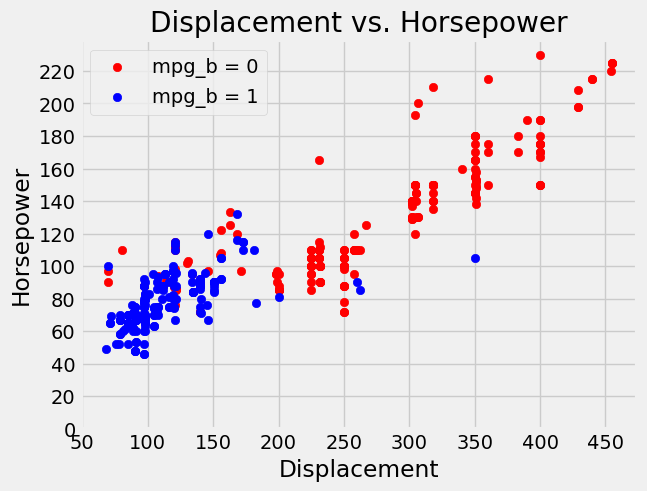

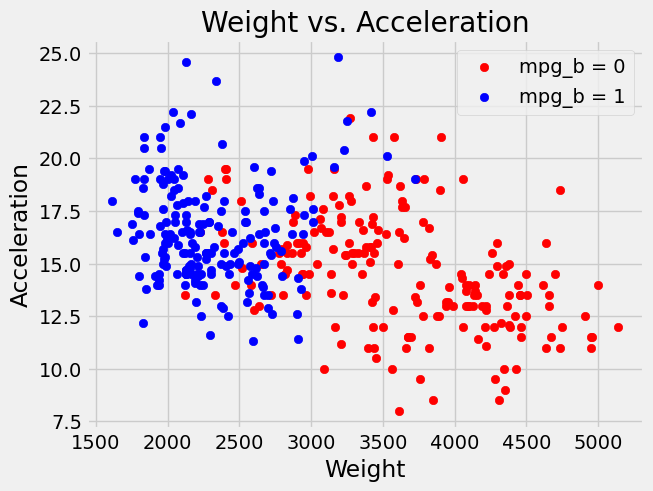

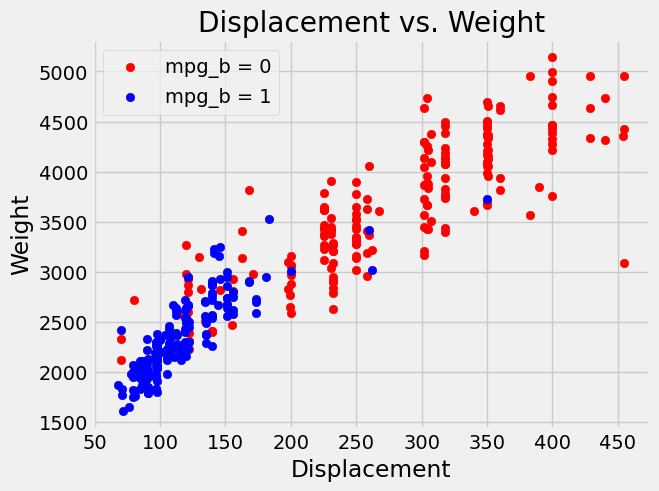

In [10]:
# Convert 'horsepower' column to numeric values, coercing non-numeric values to NaN
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
max_horsepower = auto_df['horsepower'].dropna().max()

# Scatter plot for displacement vs. horsepower
plt.scatter(auto_df.loc[auto_df['mpg_b'] == 0, 'displacement'], auto_df.loc[auto_df['mpg_b'] == 0, 'horsepower'], color='red', label='mpg_b = 0')
plt.scatter(auto_df.loc[auto_df['mpg_b'] == 1, 'displacement'], auto_df.loc[auto_df['mpg_b'] == 1, 'horsepower'], color='blue', label='mpg_b = 1')
plt.xlabel('Displacement')
plt.ylabel('Horsepower')
plt.yticks(range(0, int(auto_df['horsepower'].max()) + 10, 20))  # Adjust y-axis ticks
plt.title('Displacement vs. Horsepower')
plt.legend()
plt.show()

# Scatter plot for weight vs. acceleration
plt.scatter(auto_df.loc[auto_df['mpg_b'] == 0, 'weight'], auto_df.loc[auto_df['mpg_b'] == 0, 'acceleration'], color='red', label='mpg_b = 0')
plt.scatter(auto_df.loc[auto_df['mpg_b'] == 1, 'weight'], auto_df.loc[auto_df['mpg_b'] == 1, 'acceleration'], color='blue', label='mpg_b = 1')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.title('Weight vs. Acceleration')
plt.legend()
plt.show()

# Scatter plot for displacement vs. weight
plt.scatter(auto_df.loc[auto_df['mpg_b'] == 0, 'displacement'], auto_df.loc[auto_df['mpg_b'] == 0, 'weight'], color='red', label='mpg_b = 0')
plt.scatter(auto_df.loc[auto_df['mpg_b'] == 1, 'displacement'], auto_df.loc[auto_df['mpg_b'] == 1, 'weight'], color='blue', label='mpg_b = 1')
plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.title('Displacement vs. Weight')
plt.legend()
plt.show()

Based on the plots above, using weight and displacement as predictors seems like a good way to go.

The scatter plot of weight vs. displacement shows a clear separation between the two classes of mpg_b, indicating that these two features might be useful in predicting the binary outcome.

However, it's worth noting that the scatter plot of weight vs. acceleration doesn't show as clear a separation between the two classes. The variability in the y-axis values across both classes suggests that acceleration alone may not be a strong differentiator for predicting mpg_b.

Therefore, focusing on weight and displacement as predictors might yield more reliable results in predicting the binary outcome mpg_b, while considering acceleration in the predictive model may not provide as much discrimination between the two classes.

#### Question 5. (Split the data, 2 points)

Split the data into a training set and a test set. Select **randomly** 50 rows of your data frame and extract their data into a test data frame. The rest of the 347 rows should form your training data frame. You can use `train_test_split`, if you find it helpful, or write your own code.

In [11]:
from sklearn.model_selection import train_test_split

X = auto_df[['weight', 'acceleration']]
Y = auto_df[['mpg_b']].rename(columns={"mpg_b": "Class"})

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=50/397, random_state=12, shuffle = True)

test_df = pd.concat([X_test, y_test], axis=1)
print(test_df.shape)
test_df.head(10)

(50, 3)


,weight,acceleration,Class
394,2295,11.6,1.0
385,2945,16.4,1.0
254,2965,15.8,0.0
1,3693,11.5,0.0
35,3329,15.5,0.0
261,3410,15.1,0.0
39,4464,11.5,0.0
52,2065,14.5,1.0
319,2542,17.5,1.0
229,4220,11.1,0.0


In [12]:
train_df = pd.concat([X_train, y_train], axis=1)
print(train_df.shape)
train_df.head(10)

(347, 3)


,weight,acceleration,Class
273,2405,14.9,1.0
381,2245,16.9,1.0
205,2155,16.4,1.0
284,3360,16.6,0.0
250,3735,13.2,0.0
372,2735,18.0,1.0
127,2901,16.0,0.0
177,2694,15.0,NaN
168,2639,17.0,NaN
122,2660,14.0,1.0


#### Question 6. (kNN for mpg_b, 16 points)

The goal here is to construct a kNN algorithm that has high **accuracy** (proportion of test examples labeled correctly). Recall that you have to take into consideration: (i) the type of features (categorical, quantitative); (ii) the scaling of the features; (iii) the distance you use; (iv) the features in the model; (v) the number of neighbors, k.

You can choose to use only the variables that seem most associated with **mpg_b** from Q4. Try several values of k, and report on your val errors. Which value of k performs best?

**Note:** You need to write the code for the algorithm and not use kNN functions in Python libraries. You may use any of the functions we wrote in the lecture notebooks.

For full credit:

 - correctly pre-process data (2pts)
 
 - create a kNN model using code that predicts the given output. (4pts)
 
 - Experiment with 2 models (based on features from Q4). One that includes categorical dummy encoded variables, and one that only includes numerical variables. (4pts)
 
 - Use Cross validation on both models (LOO or k-fold? Justify what you choose) to tune $k$. (4pts)
 
 - Visualize your accuracies against different values of k and determine the best $k$. (2pts)

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import mode

def knn_classify(X_train, y_train, X_test, k):
    """
    Perform k-nearest neighbors (KNN) classification.
    """
    y_pred = []
    for i in range(X_test.shape[0]):
        distances = np.sqrt(np.sum((X_train - X_test.iloc[i])**2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_classes = y_train.iloc[nearest_indices]
        predicted_class = mode(nearest_classes)[0][0]

        y_pred.append(predicted_class)
    
    # Convert the list of predicted classes to a pandas Series
    y_pred = pd.Series(y_pred, index=X_test.index)
    
    return y_pred


In [17]:
# first model: classifying points as mpg_b = 0 or mpg_b = 1 using predictors 'weight' and 'acceleration'

from sklearn.model_selection import train_test_split

X = auto_df[['weight', 'acceleration']]
Y = auto_df[['mpg_b']].rename(columns={"mpg_b": "Class"})

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=50/397, random_state=12, shuffle = True)

weight_accl_df_report = classify_test(X_train,y_train, X_test, 3)
weight_accl_df_report['Actual_Class'] = test_df.Class
weight_accl_df_report.head(10)

,weight,acceleration,Predicted_Class,Actual_Class
394,2295,11.6,1.0,1.0
385,2945,16.4,0.0,1.0
254,2965,15.8,0.0,0.0
1,3693,11.5,0.0,0.0
35,3329,15.5,0.0,0.0
261,3410,15.1,0.0,0.0
39,4464,11.5,0.0,0.0
52,2065,14.5,1.0,1.0
319,2542,17.5,1.0,1.0
229,4220,11.1,0.0,0.0


In [20]:
from sklearn.model_selection import KFold

k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

n_splits = 5
kf = KFold(n_splits=n_splits)

results = {}

for k in k_values:
    fold_accuracies = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        y_pred = knn_classify(X_train_fold, y_train_fold, X_val_fold, k)
        accuracy = (y_pred == y_val_fold['Class']).mean()
        fold_accuracies.append(accuracy)
    
    average_accuracy = np.mean(fold_accuracies)
    
    results[k] = average_accuracy

for k, accuracy in results.items():
    print(f"Average accuracy for k={k}: {accuracy}")

Average accuracy for k=1: 0.7751552795031056
Average accuracy for k=2: 0.8012836438923395
Average accuracy for k=3: 0.8243064182194617
Average accuracy for k=4: 0.8300207039337474
Average accuracy for k=5: 0.8184679089026915
Average accuracy for k=6: 0.8300207039337474
Average accuracy for k=7: 0.8358178053830227
Average accuracy for k=8: 0.847287784679089
Average accuracy for k=9: 0.847287784679089


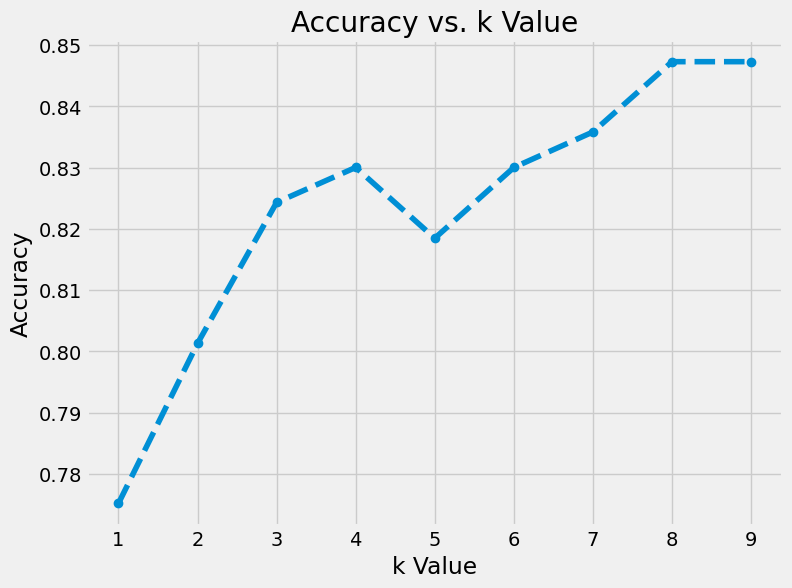

In [21]:
import matplotlib.pyplot as plt

k_values = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')

plt.grid(True)

plt.show()

In [22]:
# second model: classifying points' origin of car (1. American, 2. European, 3. Japanese) based on predictors
# from standardized_auto_df, 'mpg_standard' and 'displacement_standard'

from sklearn.model_selection import train_test_split

X = auto_df[['displacement', 'year']]
Y = auto_df[['mpg_b']].rename(columns={"mpg_b": "Class"})

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=14, shuffle = True)

weight_accl_df_report = classify_test(X_train,y_train, X_test, 5)
weight_accl_df_report['Actual_Class'] = auto_df.mpg_b
weight_accl_df_report.head(10)

,displacement,year,Predicted_Class,Actual_Class
385,181.0,82,1.0,1.0
225,250.0,77,0.0,0.0
266,98.0,78,1.0,1.0
1,350.0,70,0.0,0.0
14,113.0,70,1.0,1.0
20,110.0,70,1.0,1.0
44,400.0,71,0.0,0.0
33,232.0,71,0.0,0.0
81,97.0,72,1.0,1.0
151,79.0,74,1.0,1.0


In [23]:
from sklearn.model_selection import KFold

k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

n_splits = 9
kf = KFold(n_splits=n_splits)

results = {}

for k in k_values:
    fold_accuracies = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        y_pred = knn_classify(X_train_fold, y_train_fold, X_val_fold, k)
        accuracy = (y_pred == y_val_fold['Class']).mean()
        fold_accuracies.append(accuracy)
    
    average_accuracy = np.mean(fold_accuracies)
    
    results[k] = average_accuracy

for k, accuracy in results.items():
    print(f"Average accuracy for k={k}: {accuracy}")

Average accuracy for k=1: 0.8422398589065255
Average accuracy for k=2: 0.8295414462081129
Average accuracy for k=3: 0.8769841269841269
Average accuracy for k=4: 0.8706349206349205
Average accuracy for k=5: 0.8645502645502645
Average accuracy for k=6: 0.8582010582010582
Average accuracy for k=7: 0.8645502645502645
Average accuracy for k=8: 0.867636684303351
Average accuracy for k=9: 0.8581128747795415


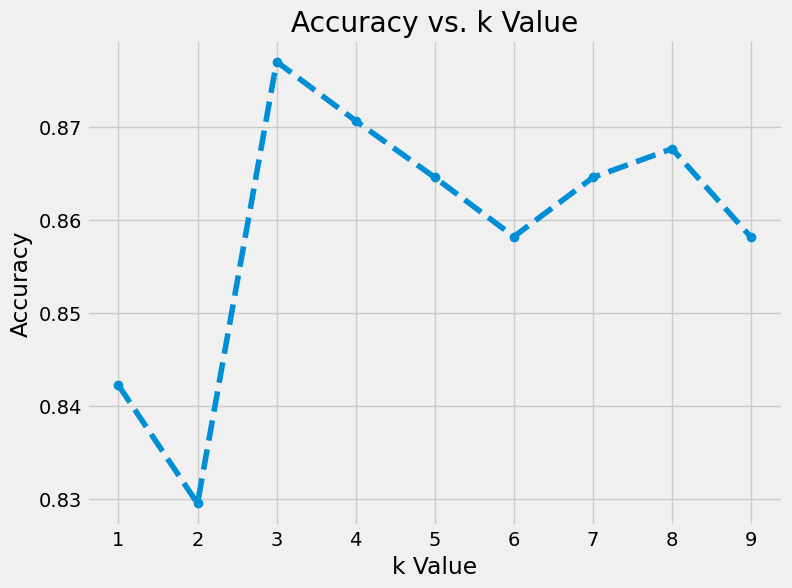

In [24]:
import matplotlib.pyplot as plt

k_values = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')

plt.grid(True)

plt.show()

I decided to use a k_fold for both of my models, as I concluded that each respective set would be too large for LOO CV. For the first model, the k-value with the highest accuracy was a tie between k=8 and k=9. For the second model, the k-value with the highest accuracy was k=3.

#### Question 7. (kNN for country of origin, 18 points)

The goal here is to construct a kNN algorithm for classification of country of origin. Instructions are similar to those in Q6 - the main difference is that `origin` has 3 labels so you need to modify your code to account for that. This is another example of **multi-class classification**.

Issues to consider:
- as before, you need training and testing data
- try several values of k 
- feature selection, scaling, distance are important
- are the three groups balanced?
- how do you break ties? Note, our in-class code made an assumption about tie breaking. Try different options to break ties.

**Hints (on tie breaking)**: (i) random selection between tied labels; (ii) use the distances when tied (closer neighbors are more relevant).



For full credit:

 - Consider what features to use. Describe what you did and why you decided on which features in 2-3 sentences (3pts)
 
 - create a kNN model using code that predicts the given output. (4pts)
 
 - Experiment with 2 models. One that uses random selection between tied labels and one that considers which neighbors are more relevant to break ties. (5pts)
 
 - Use Cross validation on both models to tune $k$. (4pts)
 
 - Visualize your accuracies against different values of k and determine the best $k$. (2pts)

In [37]:
#GAHHHHH I CANT FIGURE THIS OUT

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X = auto_df[['weight', 'acceleration']]
y = auto_df[['origin']].rename(columns={"origin": "Class"})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def knn_accuracy(k, X_train, y_train, X_test, y_test, tie_breaking_strategy):
    '''function to calculate kNN accuracy with tie-breaking strategy'''
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    if tie_breaking_strategy == 'random':
        y_pred = knn.predict(X_test)
    elif tie_breaking_strategy == 'distance':
        y_pred = []
        for x in X_test:
            distances, indices = knn.kneighbors([x])
            weighted_votes = 1 / distances[0]
            class_votes = np.zeros(len(np.unique(y_train)))
            for j in range(k):
                class_votes[y_train.iloc[indices[0, j]]] += weighted_votes[j]
            predicted_label = np.argmax(class_votes)
            y_pred.append(predicted_label)
    accuracy = (np.array(y_pred).flatten() == np.array(y_test).flatten()).mean()
    return accuracy

n_splits = 5
kf = KFold(n_splits=n_splits)

k_values = list(range(1, 21))
tie_breaking_strategies = ['random', 'distance']
results = {}

for tie_breaking_strategy in tie_breaking_strategies:
    tie_breaking_results = []
    for k in k_values:
        fold_accuracies = []
        for train_index, val_index in kf.split(X_train_scaled):
            X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            accuracy = knn_accuracy(k, X_train_fold, y_train_fold, X_val_fold, y_val_fold, tie_breaking_strategy)
            fold_accuracies.append(accuracy)
        average_accuracy = np.mean(fold_accuracies)
        tie_breaking_results.append(average_accuracy)
    results[tie_breaking_strategy] = tie_breaking_results

plt.figure(figsize=(10, 6))
for strategy, accuracies in results.items():
    plt.plot(k_values, accuracies, label=strategy)
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(k_values)
plt.show()

# Determine the best k for each tie-breaking strategy
best_k_values = {}
for strategy, accuracies in results.items():
    best_k = k_values[np.argmax(accuracies)]
    best_k_values[strategy] = best_k
    print(f"Best k for tie-breaking strategy '{strategy}': {best_k}")


/Users/jonathandavidoff/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/jonathandavidoff/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/jonathandavidoff/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/jonathandavidoff/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y

IndexError: index 3 is out of bounds for axis 0 with size 3

*Write your answer here, replacing this text.*